# Capitulo 3. Clasificación

Proyecto de clasificación, para diagnosticar medicamenttos basándose en las caracteristicas de los pacientes.

## <span style="color:green">1. Descargar los datos 📉</span>

EN ESTE PROYECTO SOLO VAMOS A NECESITAR LA BASE DE DATOS drug300.csv.💊

https://github.com/a2Proyectos/MachineLearning_Data



In [ ]:
# Importa las librerias
import pandas as pd


In [ ]:
## Define una función para extraer los datos
#DOWNLOAD_ROOT es la base del GitHub donde vamos a estar descargando las bases de datos.

#Complementos con la dirección especifica de la base de datos que queremos.

def extraer_datos(root, database):
    csv_path = root + database
    return pd.read_csv(csv_path)

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/a2Proyectos/MachineLearning_Data/refs/heads/main/"
MEDICAMENTOS = "Capitulo_3/drug200.csv"

df = extraer_datos(DOWNLOAD_ROOT, MEDICAMENTOS)



In [ ]:
# Visualiza el DataFrame
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [ ]:
# Obten información de los datos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


## <span style="color:green">2. Análisis de cada Variable</span>

<Figure size 900x500 with 0 Axes>

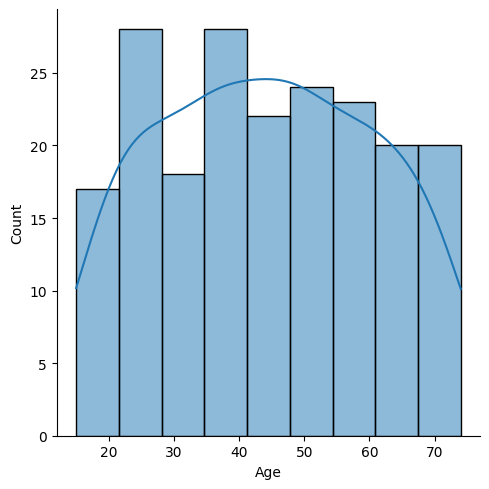

In [ ]:
#Importa seaborn para tener gráficos más chidos
import seaborn as sns
import matplotlib.pyplot as plt


#Gráfica la variable
#Establece una área de figsize(9,5) es decir, el tamaño de la imagen

#Crea un displot para de la edad (por ser una variable numérica)
import seaborn as sns

plt.figure(figsize = (9,5))

sns.displot(df.Age,kde=True)

In [ ]:
# Género: cuenta cuántos hombres y mujeres hay
df.Sex.value_counts()

,count
Sex,
M,104
F,96


<Axes: xlabel='BP', ylabel='Count'>

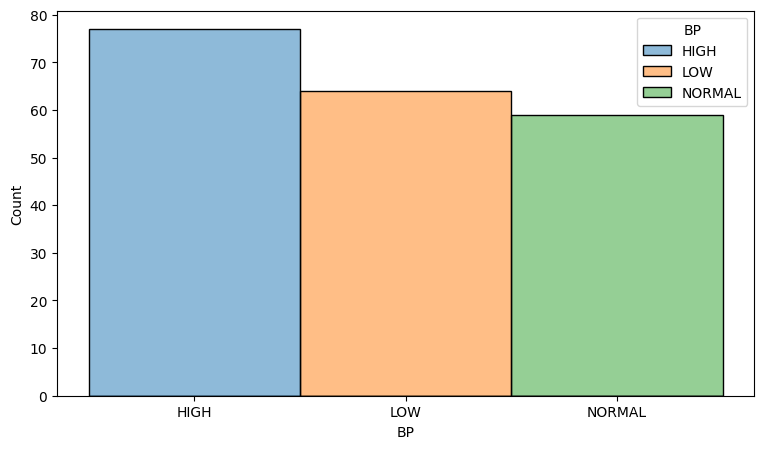

In [ ]:
# Crea una gráfica de barras para Presión Sanguinea
plt.figure(figsize = (9,5))

sns.histplot(data=df,x="BP",hue="BP")

<Axes: xlabel='Cholesterol', ylabel='Count'>

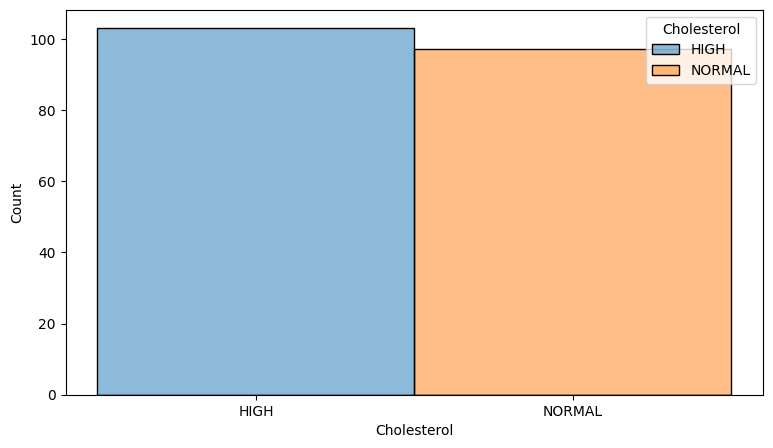

In [ ]:
# Crea una gráfica de barras para Colesterol
plt.figure(figsize = (9,5))

sns.histplot(data=df,x="Cholesterol",hue="Cholesterol")


<Figure size 900x500 with 0 Axes>

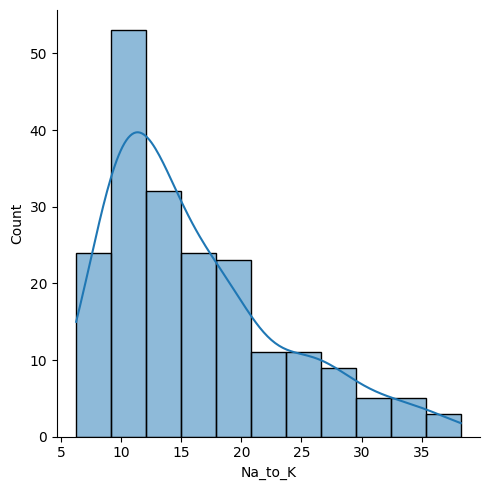

In [ ]:
# Crea un displot para Sodio Potasio
plt.figure(figsize = (9,5))

sns.displot(df.Na_to_K,kde=True)

,count
Drug,
DrugY,91
drugX,54
drugA,23
drugC,16
drugB,16


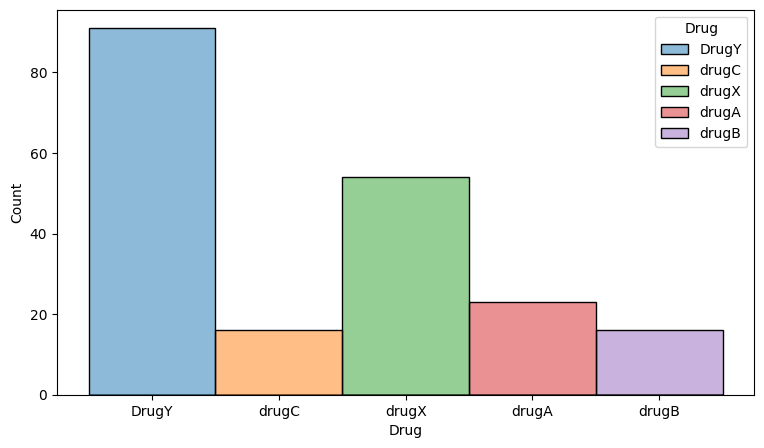

In [ ]:
# Crea una gráfica de barras para los Medicamentos (droga) 💊

#Cuenta los medicamentos
plt.figure(figsize = (9,5))

sns.histplot(data=df,x="Drug",hue="Drug")

df.Drug.value_counts()

***

## <span style="color:green">3. Análisis de Relación entre Variables</span>


Text(0.5, 1.0, 'Edad/Medicamento')

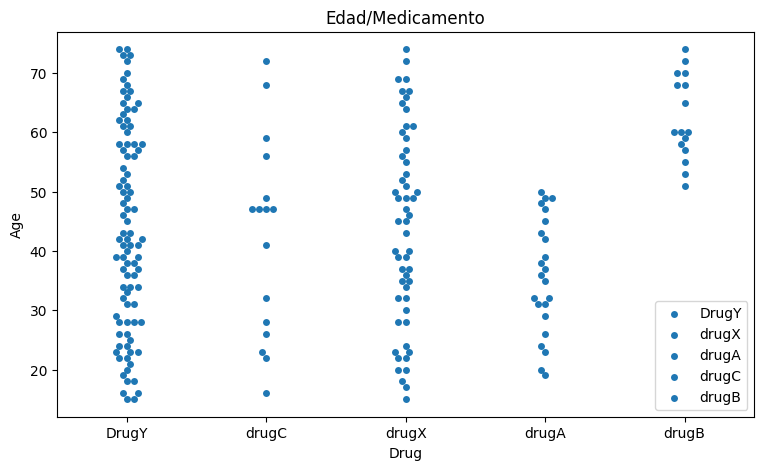

In [ ]:
## Grafica (con swarmplot) la relación entre la Edad y los Medicamentos que se les da acorde a 💊
plt.figure(figsize = (9,5))

sns.swarmplot(x = "Drug", y = "Age",data = df)

plt.legend(df.Drug.value_counts().index)

plt.title("Edad/Medicamento")

Text(0.5, 1.0, 'Género/Medicamento')

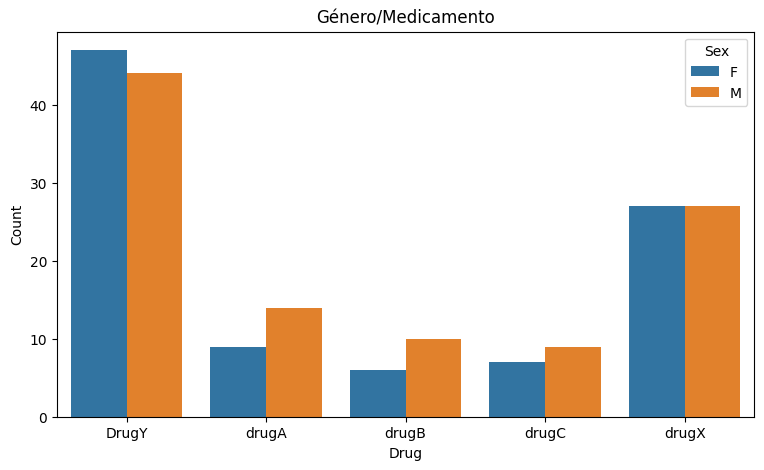

In [ ]:
# Grafica la relación entre el el Género y los Medicamentos 💊 que se les da
#Primero armar una tablita para poder graficarlas
df_Sex_Drug = df.groupby(["Drug","Sex"]).size().reset_index(name = "Count")

df_Sex_Drug
#Grafica la tablita anterior con una gráfica de barras
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "Sex",data = df_Sex_Drug)

plt.title("Género/Medicamento")

Text(0.5, 1.0, 'Presión Sanguinea/Medicamentos')

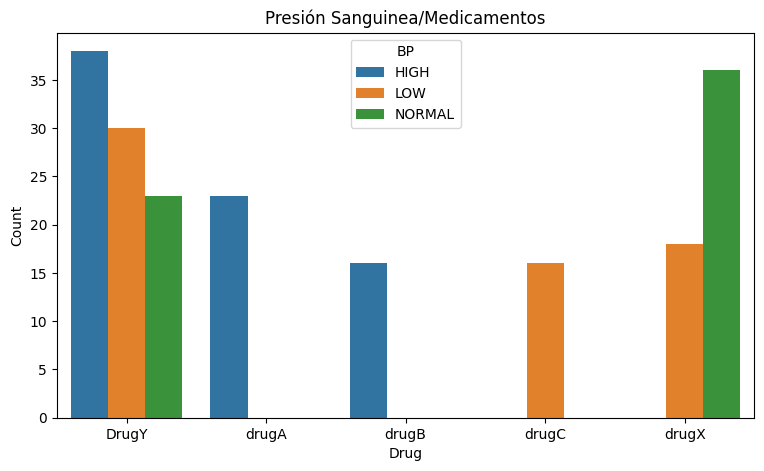

In [ ]:
# Grafica la relación entre la Presión Sanguínea y los Medicamentos 💊
df_BP_Drug = df.groupby(["Drug","BP"]).size().reset_index(name = "Count")
plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "BP",data = df_BP_Drug)

plt.title("Presión Sanguinea/Medicamentos")

Text(0.5, 1.0, 'Cholesterol -- Drug')

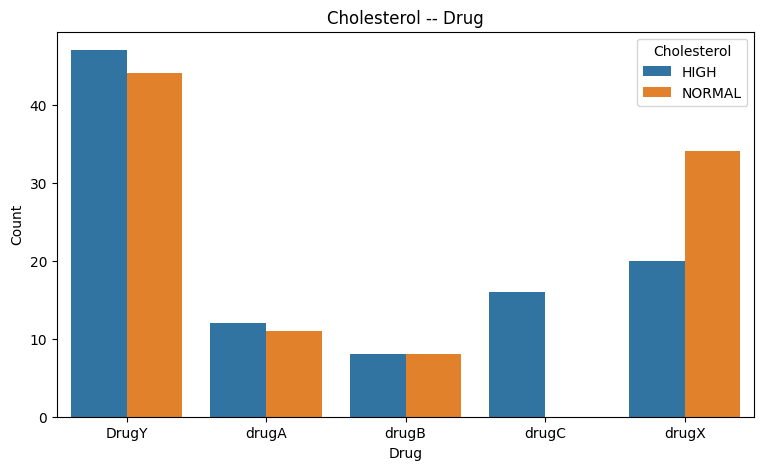

In [ ]:
# Grafica (con una gráfica de barras)nla relación entre el nivel de colesterol y los medicamentos 💊
df_CH_Drug = df.groupby(["Drug","Cholesterol"]).size().reset_index(name = "Count")

df_CH_Drug



plt.figure(figsize = (9,5))

sns.barplot(x = "Drug",y="Count", hue = "Cholesterol",data = df_CH_Drug)

plt.title("Cholesterol -- Drug")

Text(0.5, 1.0, 'Sodio-Potasio/Medicamentos')

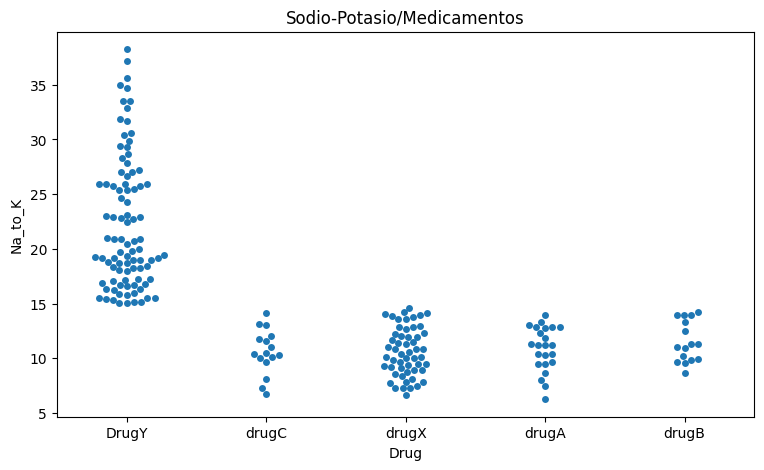

In [ ]:
#Grafica (con un swarmplot) la relación entre el nivel de Sodio-Potasio y los medicamentos 💊 que se les da
plt.figure(figsize = (9,5))

sns.swarmplot(x = "Drug", y = "Na_to_K",data = df)

plt.title("Sodio-Potasio/Medicamentos")

***

## <span style="color:green">4. Limpieza y Separación de Datos</span>


In [ ]:
## Utilizar LabelEncoder para procesar variables alfanuméricas como el sexo, BP, Colesterol, étc
from sklearn.preprocessing import LabelEncoder

def label_encoder(datos_categoria):

    le = LabelEncoder()

    df[datos_categoria] = le.fit_transform(df[datos_categoria])


In [ ]:
# Crear set de entrenamiento y set de prueba
variables = ["Sex","BP","Cholesterol","Na_to_K","Drug"]

for l in variables:

    label_encoder(l)

df.head()
x = df.drop(["Drug"],axis=1)

y = df.Drug
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42, shuffle = True)

El 20% de los datos, serán de prueba. Shuffle será true. Semilla de Aleatoriedad=42

***

## <span style="color:green">5. Modelo de Clasificación Binario</span>


In [ ]:
## Crear modelo para medicamento
y_train_c = (y_train == 0)

y_test_c = (y_test == 0)


Empezaremos con la medicina Y porque es la más popular y, por ende la más fácil de predecir

In [ ]:
## Modelo SGD= Stochastic Gradient Descent (próximamente)
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier(random_state=42)
sgd.fit(x_train,y_train)


SGDClassifier(random_state=42)

In [ ]:
#Predecir la medicina a tomar de un humano que ya sepas el resultado
sgd.predict([[47,1,1,0,8]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2])

👀: para saber que le esta yendo bien al modelo tienen que coincidir los resultados

***

## <span style="color:green">6. Medidas de desempeño</span>


### <span style="color:blue">6.1 Exactitud</span>

In [ ]:
# Realiza una Cross validation/K-Folds
from sklearn.model_selection import cross_val_score

cross_val_score(sgd,x_train,y_train,cv=3,scoring="accuracy")

array([0.44444444, 0.60377358, 0.58490566])


**cv:** número de dobleses

**scoring:** accuracy (será nuestra medida de desempeño)  

***

### <span style="color:blue">6.2 Matriz de Confusión</span>

In [ ]:
# Matriz de confusión
#Importar cross_val_predict
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd,x_train,y_train,cv=3)
#Importar confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train,y_train_pred)

array([[61, 15,  0,  0,  0],
       [ 5, 10,  0,  0,  2],
       [ 3,  5,  1,  0,  4],
       [ 4,  5,  0,  0,  2],
       [16, 11,  1,  0, 15]])

![matriz.png](attachment:3f90b91e-ff94-40c8-b015-0fd5b2eb1586.png)

**Verdaderos Negativos**: esquina superior izquierda

**Falsos positivos**: esquina superior derecha

**Falsos Negativos**: esquina inferior izquierda

**Verdaderos Positivos**: esquina inferior derecha

***

### <span style="color:blue">6.3 Precision y Recall</span>

In [ ]:
from sklearn.metrics import precision_score, recall_score

p = precision_score(y_train, y_train_pred, average='macro')
r = recall_score(y_train, y_train_pred, average='macro')

p, r


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


(0.41099169516365414, 0.3633254318580836)

![image.png](attachment:7eddb0e3-9b2f-40e6-8859-a4ba9718b0b8.png)

![image.png](attachment:c3eee779-8ac5-44f2-ac4c-b18a71b57466.png)

In [ ]:
#Cambiar de clasificador
#Importar RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Hacer la matriz de confusión otra vez
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state = 42)

rfc.fit(x_train,y_train)

y_train_pred = cross_val_predict(rfc,x_train,y_train,cv=3)

In [ ]:
p = precision_score(y_train, y_train_pred, average='macro')
r = recall_score(y_train, y_train_pred, average='macro')

p, r

(0.9468676122931443, 0.9092565329407435)

![image.png](attachment:5efcdf08-55c6-4026-990c-e851bc3241af.png)

***

### <span style="color:blue">6.4 Umbral Precision y Recall</span>

In [45]:
#Puntación de un paciente aleatorio
y_score = sgd.decision_function([[47,1,1,0,8]])

y_score

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-41664.93573986,   1043.10847762,   3807.83650654,
         -2059.93510373,   2279.45835052]])

El umbral te permite conocer qué medida priorizar acorde a tus objetivos. Ya sea que estemos hablando de videos de youtube para niños 🍭 o un sistema de seguridad 🔒.

***

## <span style="color:green">7. Clasificadores Multiclase</span>


In [79]:
# Importar SVC=Support Vector Classifier

from sklearn.svm import SVC

svm = SVC()

svm.fit(x_train,y_train)

svm.predict([[25,0,1,0,167]])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([0])

In [81]:
#Utilizar decision_function para observar los puntajes de cada medicina
some_scores = svm.decision_function([[25,0,1,0,167]])

some_scores
#Decidirá por el qué tenga mayor puntaje

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 4.29349959,  1.78865857,  0.769853  , -0.27117688,  3.16304987]])

In [83]:
#Ahora, utiliza el clasificador multiclase
import numpy as np
#Predecir a un humano ahora con este clasificador
np.argmax(some_scores)

np.int64(0)

In [86]:
#Utilizar decision_function para observar los puntajes de cada medicina

from sklearn.multiclass import OneVsRestClassifier

svm = OneVsRestClassifier(SVC())

svm.fit(x_train,y_train)

svm.predict([[25,0,1,0,167]])


some_scores = svm.decision_function([[25,0,1,0,167]])

some_scores

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have va

array([[ 2.3347801 , -1.0183752 , -1.01956626, -1.000855  , -1.08102198]])

***

## <span style="color:green">8. Analizar Errores</span>

In [76]:
#Hacer un clasificador de random forest
y_train_pred = cross_val_predict(rfc, x_train, y_train, cv=3)

conf_mz = confusion_matrix(y_train,y_train_pred)

conf_mz

array([[75,  0,  0,  1,  0],
       [ 0, 17,  0,  0,  0],
       [ 0,  1, 12,  0,  0],
       [ 0,  0,  0,  7,  4],
       [ 0,  0,  0,  0, 43]])

In [77]:
#Utilizar la matriz de confusión
df['Na_to_K_Bigger_Than_15'] = [1 if i >=15.015 else 0 for i in df.Na_to_K]

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug,Na_to_K_Bigger_Than_15
0,23,0,0,0,167,0,1
1,47,1,1,0,89,3,1
2,47,1,1,0,43,3,1
3,28,0,2,0,10,4,0
4,61,0,1,0,133,0,1
